6.2.1. Решение обыкновенных дифференциальных уравнений

6.2.1.1. Модель экспоненциального роста

In [1]:
# подключаем необходимые пакеты:
#import Pkg
#Pkg.add("DifferentialEquations")
using DifferentialEquations

In [2]:
# задаём описание модели с начальными условиями:
a = 0.98
f(u,p,t) = a*u
u0 = 1.0
# задаём интервал времени:
tspan = (0.0,1.0)
# решение:
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 5-element Array{Float64,1}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436028208104
 1.0
u: 5-element Array{Float64,1}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384275623003
 2.664456142481452

In [3]:
# подключаем необходимые пакеты:
#Pkg.add("Plots")
using Plots

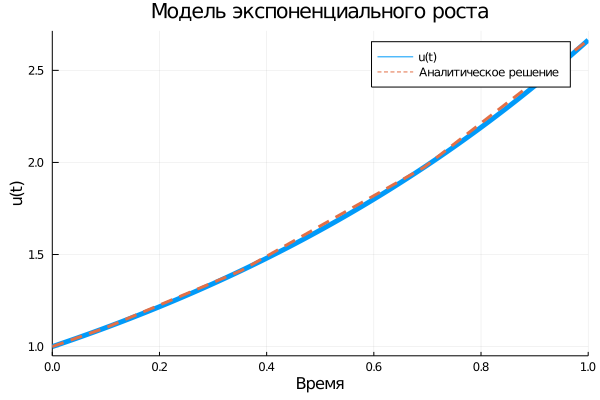

In [4]:
# строим графики:
plot(sol, linewidth=5,title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="u(t)")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,label="Аналитическое решение")

retcode: Success
Interpolation: automatic order switching interpolation
t: [0.0, 0.04127492324135852, 0.14679917846877366, 0.28631546412766684, 0.4381941361169628, 0.6118924302028597, 0.7985659100883337, 0.9993516479536952, 1.0]
u: [1.0, 1.0412786454705882, 1.1547261252949712, 1.3239095703537043, 1.5363819257509728, 1.8214895157178692, 2.1871396448296223, 2.662763824115295, 2.664456241933517]


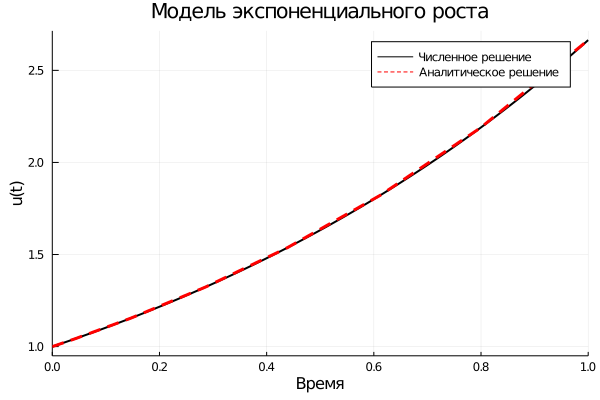

In [5]:
# задаём точность решения:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
println(sol)
# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t,
t->1.0*exp(a*t),lw=3,ls=:dash,color="red",label="Аналитическое решение")

6.2.1.2. Система Лоренца

In [6]:
# подключаем необходимые пакеты:
#import Pkg
#Pkg.add("DifferentialEquations")
using DifferentialEquations, Plots;

In [7]:
# задаём описание модели:
function lorenz!(du,u,p,t)
σ,ρ,β = p
du[1] = σ*(u[2]-u[1])
du[2] = u[1]*(ρ-u[3]) - u[2]
du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

In [8]:
# задаём начальное условие:
u0 = [1.0,0.0,0.0]
# задаём знанчения параметров:
p = (10,28,8/3)
# задаём интервал времени:
tspan = (0.0,100.0)
# решение:
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 1294-element Array{Float64,1}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.0276899566248403
   0.041856345938267966
   0.06024040228733675
   0.08368539694547242
   0.11336497050342806
   0.14862178548871152
   0.18703974465019643
   ⋮
  99.15166031662457
  99.22514723290307
  99.31227549560941
  99.39403070915297
  99.47001147494375
  99.54379656909015
  99.614651558349
  99.69093823148101
  99.78733023233721
  99.86114450046736
  99.96115759510786
 100.0
u: 1294-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.8800455868998046, 0.43873645009348244, 0.0034

In [9]:
# подключаем необходимые пакеты:
Pkg.add("Plots")
using Plots

LoadError: UndefVarError: Pkg not defined

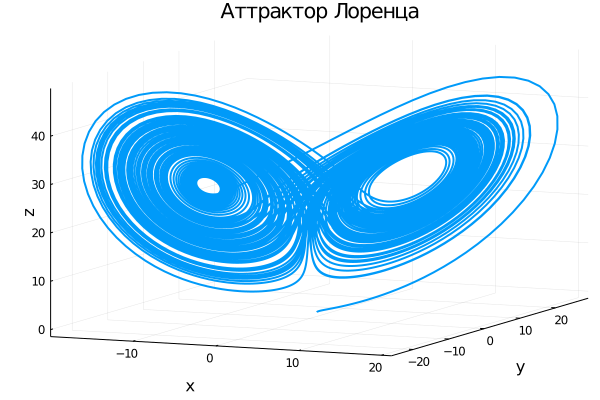

In [10]:
# строим график:
plot(sol, vars=(1,2,3), lw=2, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

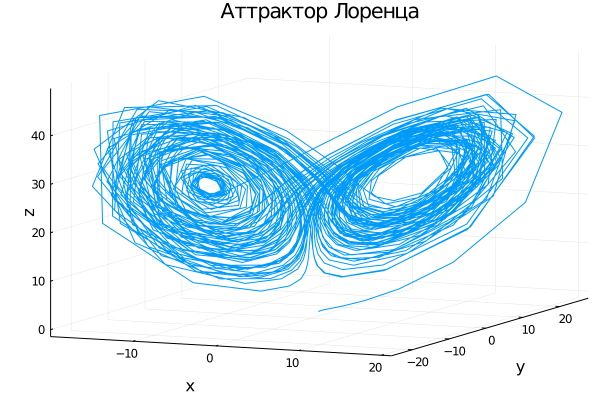

In [11]:
# отключаем интерполяцию:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

6.2.2. Модель Лотки–Вольтерры

In [12]:
# подключаем необходимые пакеты:
#import Pkg
#Pkg.add("ParameterizedFunctions")
using ParameterizedFunctions, DifferentialEquations, Plots;

In [13]:
# задаём описание модели:
lv! = @ode_def LotkaVolterra begin
dx = a*x - b*x*y
dy = -c*y + d*x*y
end a b c d

(::LotkaVolterra{var"###ParameterizedDiffEqFunction#333",var"###ParameterizedTGradFunction#334",var"###ParameterizedJacobianFunction#335",Nothing,Nothing,ODESystem}) (generic function with 1 method)

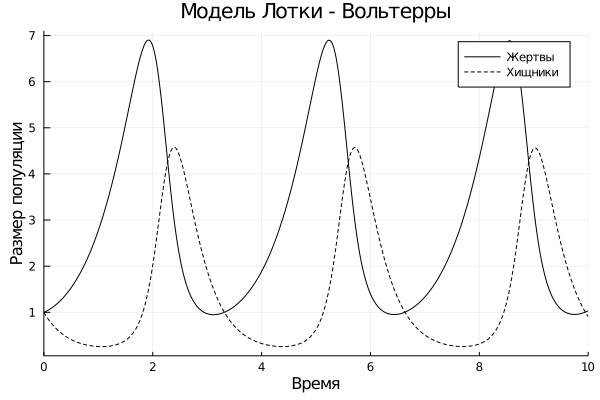

In [14]:
# задаём начальное условие:
u0 = [1.0,1.0]
# задаём знанчения параметров:
p = (1.5,1.0,3.0,1.0)
# задаём интеФрвал времени:
tspan = (0.0,10.0)
# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid :dash], title="Модель Лотки - Вольтерры",
xaxis="Время",yaxis="Размер популяции")

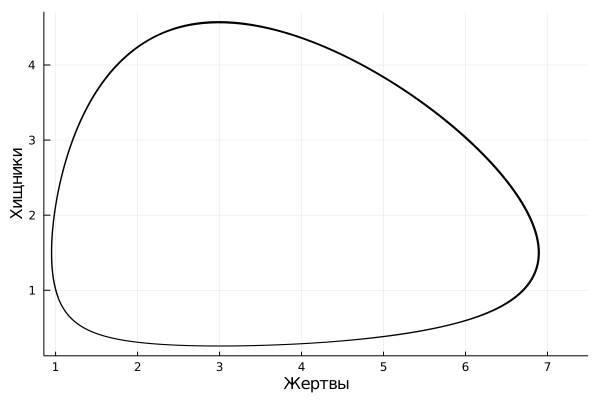

In [15]:
# фазовый портрет:
plot(sol,vars=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники", legend=false)

Задания для самостоятельного выполнения

Задание 1

In [16]:
using DifferentialEquations
# задаём описание модели с начальными условиями:
b = 0.7 #коэффициент рождаемости
c = 0.1 #коэффициент смертности
a = b-c # коэффициент роста популяции
f(x,p,t) = a*x
x0 = 1.0
# задаём интервал времени:
tspan = (0.0,10.0)
# решение:
prob = ODEProblem(f,x0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 13-element Array{Float64,1}:
  0.0
  0.11077877679647585
  0.4740804384690646
  1.0081836371595618
  1.6416723513672835
  2.4197287550956883
  3.314796369840269
  4.332328815819821
  5.457963155008864
  6.684698795774086
  8.001406462043974
  9.398672684176248
 10.0
u: 13-element Array{Float64,1}:
   1.0
   1.0687259799121929
   1.3290285515523248
   1.8310877042618872
   2.6778207716558358
   4.270952217428933
   7.30731849626621
  13.455573142413364
  26.437118147672944
  55.19108631207645
 121.60908432923613
 281.2235919276595
 403.4071681114453

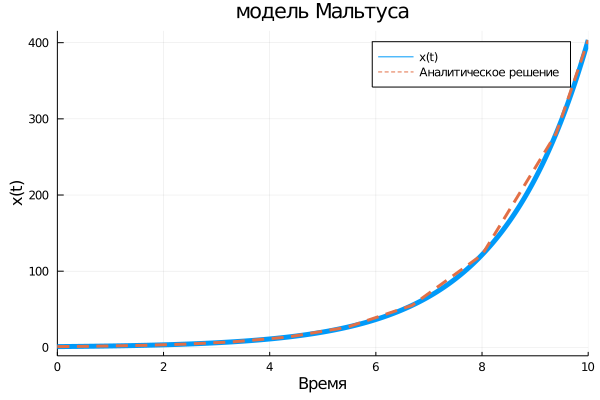

In [17]:
using Plots
# строим графики:
plot(sol, linewidth=5,title="модель Мальтуса", xaxis="Время",yaxis="x(t)",label="x(t)")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,label="Аналитическое решение")

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\1.Maltus.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\5ItHH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Admin\\1.Maltus.gif")
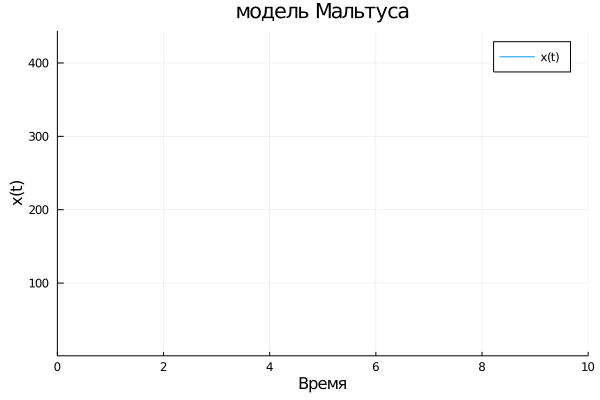

In [18]:
animate(sol, fps = 7, "1.Maltus.gif",  linewidth=5,title="модель Мальтуса", xaxis="Время",yaxis="x(t)",label="x(t)")

Задание 2

In [19]:
# задаём описание модели с начальными условиями:
r = 0.9 #коэффициент роста популяции
k = 20 #потенциальная ёмкость экологической системы
f(x,p,t) = r*x*(1-x/k)
x0 = 1.0
# задаём интервал времени:
tspan = (0.0,10.0)
# решение:
prob = ODEProblem(f,x0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 14-element Array{Float64,1}:
  0.0
  0.10320330193850687
  0.3855506045099877
  0.780748965506008
  1.262015691559725
  1.8586158648823017
  2.5749333150313944
  3.4714981889836993
  4.5715292448819005
  5.629313666416045
  6.930090935678242
  8.078262058777629
  9.531766731892224
 10.0
u: 14-element Array{Float64,1}:
  1.0
  1.092018818522065
  1.3860627615966585
  1.9212436077634998
  2.8160884736520337
  4.3793819898212325
  6.963833041109592
 10.897149912038733
 15.262797199274292
 17.86039918649099
 19.28300441595892
 19.738721261403803
 19.928358457440886
 19.952936455140726

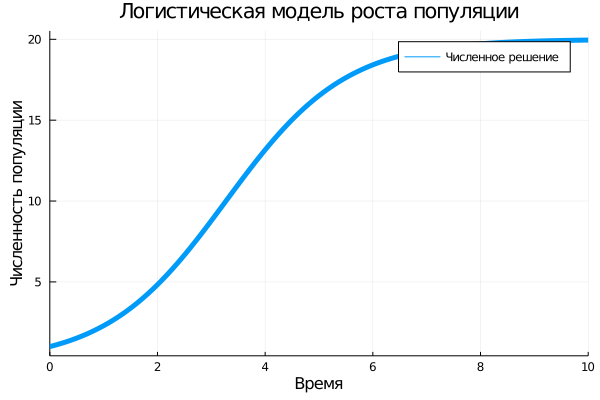

In [20]:
# строим графики:
plot(sol, linewidth=5,title="Логистическая модель роста популяции", xaxis="Время",yaxis="Численность популяции",label="Численное решение")
#plot!(sol.t, t->k/(exp(-r*t) + 1), lw=3,ls=:dash,label="Аналитическое решение")

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\2.logistModel.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\5ItHH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Admin\\2.logistModel.gif")
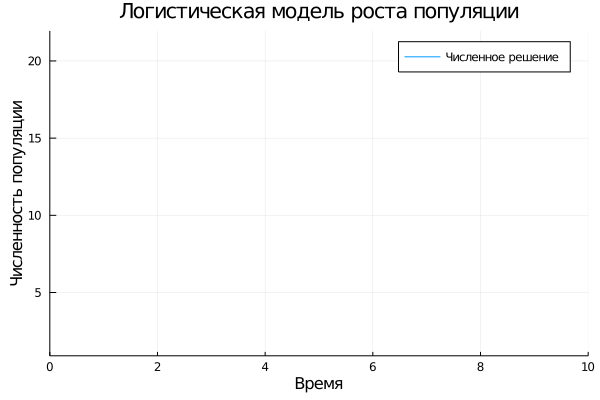

In [21]:
animate(sol, fps = 7, "2.logistModel.gif",  linewidth=5,title="Логистическая модель роста популяции",xaxis="Время",yaxis="Численность популяции",label="Численное решение")

Задание 3

In [22]:
# задаём описание модели:
sir! = @ode_def SIR begin
    ds = -β*i*s
    di = β*i*s - ν*i
    dr = ν*i
end β ν
# задаём начальное условие
u0 = [1000,8,2]
# задаём значения параметров
p = (0.0005,0.03)
# задаём интервал времени
tspan = (0.0,100.0)
# решение:
prob = ODEProblem(sir!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 32-element Array{Float64,1}:
   0.0
   0.12899112413728822
   0.6144106027322935
   1.3597509926247686
   2.236148846713095
   3.3275727507998507
   4.5907424955670395
   6.05411637988411
   7.731450937554388
   9.665161065499406
  12.056610671590565
  14.273251916231578
  17.061717873924003
   ⋮
  36.61289134100838
  39.829247851948246
  43.32901412457721
  47.159848483848506
  51.40250033389467
  56.161918561727475
  61.60371038300417
  67.99883174193076
  75.8735086137972
  86.92709196879609
  98.75047405693694
 100.0
u: 32-element Array{Array{Float64,1},1}:
 [1000.0, 8.0, 2.0]
 [999.4682186827563, 8.499865951459125, 2.031915365784547]
 [997.1552029619634, 10.673865968600063, 2.1709310694364983]
 [992.4205051106514, 15.12299298779959, 2.45650190154891]
 [984.3348758457557, 22.717777107566448, 2.9473470466777165]
 [968.6135280383915, 37.47309776244, 3.913374199168407]
 [938.2347581326376, 65.9399415743573, 5.8

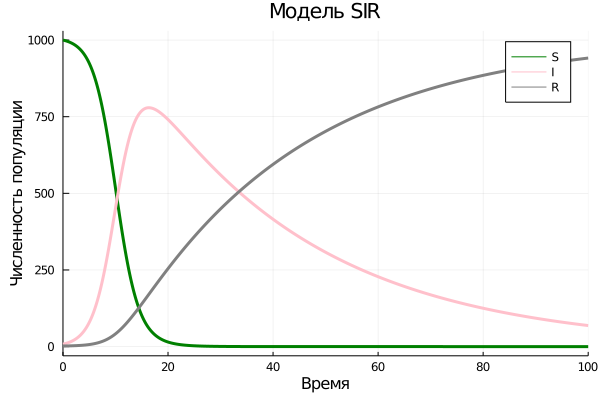

In [23]:
# строим график
plot(sol, linewidth=3,label = ["S" "I" "R"], color=[:green :pink :gray], title="Модель SIR", xaxis="Время",yaxis="Численность популяции")

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\3.SIR.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\5ItHH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Admin\\3.SIR.gif")
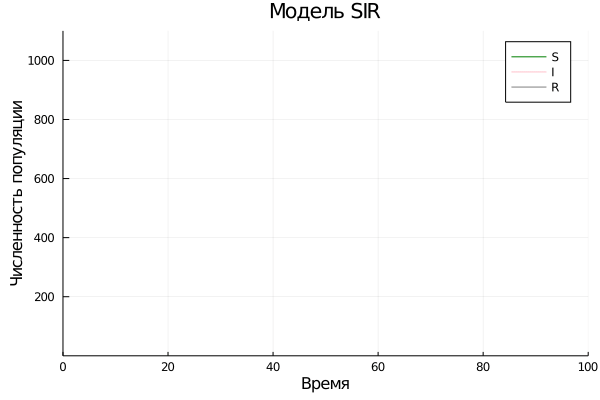

In [24]:
animate(sol, fps = 7, "3.SIR.gif",  linewidth=3,label = ["S" "I" "R"], color=[:green :pink :gray], title="Модель SIR",xaxis="Время",yaxis="Численность популяции")

Задание 4

In [25]:
# задаём описание модели:
N = 1.0
seir! = @ode_def SEIR begin
    ds = -(β/N)*s*i
    de = (β/N)*s*i - δ*e
    di = δ*e - γ*i
    dr = γ*i
end β δ γ
# задаем начальные значения:
u0 = [0.8, 0.0, 0.2, 0]
# задаем значения параметров:
p = (0.3, 0.2, 0.15)
# задаём интервал времени:
tspan = (0.0,100.0)
# решение:
prob = ODEProblem(seir!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 26-element Array{Float64,1}:
   0.0
   0.0249065866279741
   0.21568258329525578
   0.6533402693543651
   1.3011805187737153
   2.134437064823257
   3.214278086890176
   4.543969802941188
   6.171034775597869
   8.12655008352053
  10.475668808039146
  13.287370029189812
  16.662270580803337
  20.692735177365734
  25.549806174061057
  32.61021815159301
  37.883110272149274
  44.197289985260355
  50.19399712534956
  56.75924622161006
  63.461216267682616
  70.68317643954008
  78.33833762615134
  86.66949824777052
  95.74793769707264
 100.0
u: 26-element Array{Array{Float64,1},1}:
 [0.8, 0.0, 0.2, 0.0]
 [0.7988075978912587, 0.0011894345934816023, 0.19925716024526885, 0.0007458072699909356]
 [0.7898738073659333, 0.0099093282608859, 0.19384759813409327, 0.006369266239087619]
 [0.770583923249682, 0.027537600356604273, 0.18314689717551266, 0.01873157921820117]
 [0.7445655673701619, 0.04856720310506085, 0.17096182374648

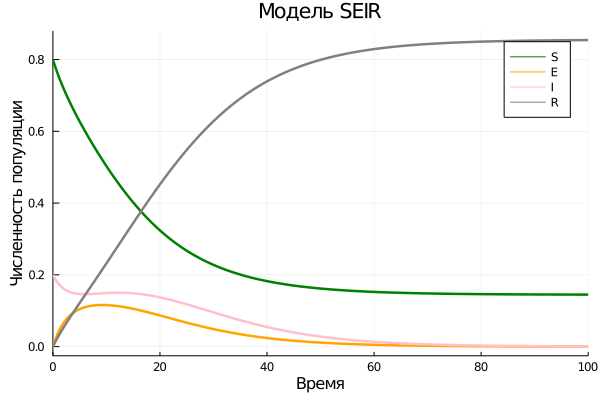

In [26]:
# строим график
plot(sol, linewidth=2.5,label = ["S" "E" "I" "R"], color=[:green :orange :pink :gray], title="Модель SЕIR", xaxis="Время",yaxis="Численность популяции")

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\4.SEIR.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\5ItHH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Admin\\4.SEIR.gif")
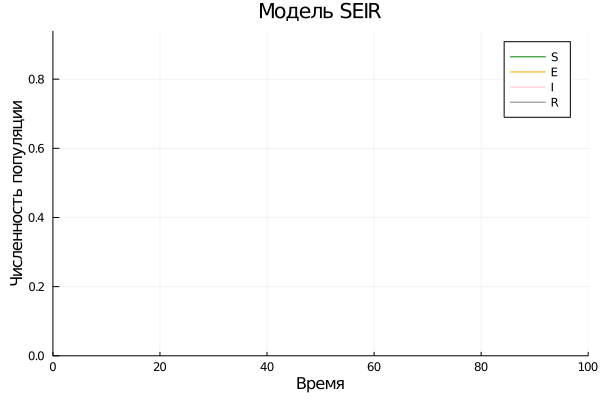

In [27]:
animate(sol, fps = 7, "4.SEIR.gif", linewidth=2.5,label = ["S" "E" "I" "R"], color=[:green :orange :pink :gray], title="Модель SEIR",xaxis="Время",yaxis="Численность популяции")

Задание 5

In [28]:
# задала начальные данные
a = 2
c = 1
d = 5
# задала начальные данные
X1 = [0.75]
X2 = [0.03]
t = 100
# задала описание модели
dLV1(x, y) = a*x*(1-x) - x*y
dLV2(x, y) = -c*y + d*x*y
# аналитическое решение для нахождения точки равновесия
equibPoint = [(1+c)/d ,(d*(a-1)-a*(1+c))/d]
for i in 1:t
    append!(X1, dLV1(X1[i], X2[i]))
    append!(X2, dLV2(X1[i], X2[i]))
end

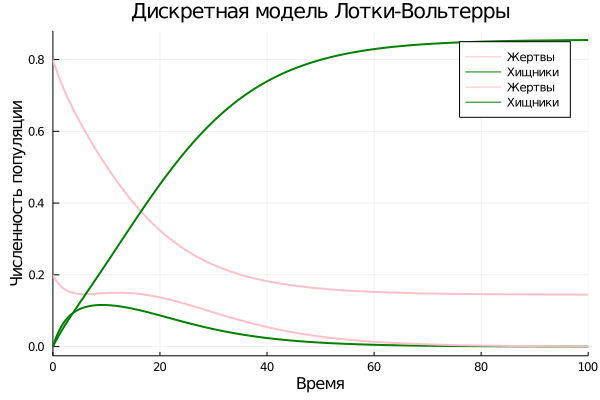

In [29]:
# строим график
plot(sol, linewidth=2,label = ["Жертвы" "Хищники"], color=[:pink :green], 
    title="Дискретная модель Лотки-Вольтерры", xaxis="Время",yaxis="Численность популяции")

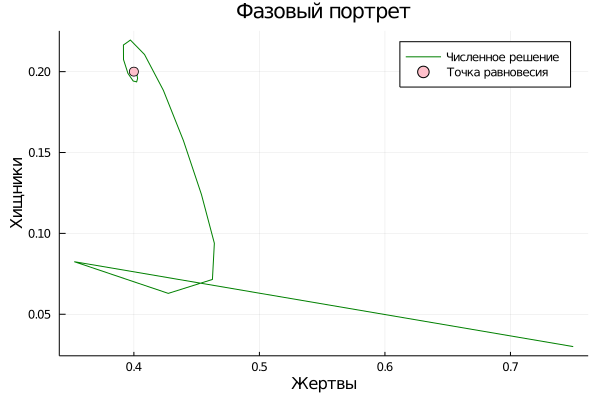

In [30]:
# фазовый портрет:
plot(X1, X2, title="Фазовый портрет", xlabel="Жертвы", ylabel="Хищники", label="Численное решение", c=:green)
#точка равновесия
scatter!([equibPoint[1]], [equibPoint[2]], c=:pink, shape=:circle, ms=5, label="Точка равновесия")

Задание 6

In [31]:
# задаём описание модели:
lv! = @ode_def CompetitiveSelectionModel begin
dx = a*x - b*x*y
dy = a*y - b*x*y
    end a b
# задаём начальное условие:
u0 = [30, 15]
# задаём знанчения параметров:
p = (0.1, 0.3)
# задаём интервал времени:
tspan = (0.0, 10.0)
# решение:/
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 40-element Array{Float64,1}:
  0.0
  0.04034715742273399
  0.09607885394064145
  0.2111732806369
  0.27873322877160844
  0.39571176776657246
  0.5037416779064952
  0.633159184860776
  0.7659632869461704
  0.9094880744126153
  1.057025359662743
  1.2097920061313179
  1.3650752342343027
  ⋮
  6.400422806596085
  6.76495980514748
  7.121108268909025
  7.481910893509734
  7.845402007668457
  8.204347047162605
  8.551613390656678
  8.883741433734274
  9.201062956332063
  9.505919727979855
  9.800894880134514
 10.0
u: 40-element Array{Array{Float64,1},1}:
 [30.0, 15.0]
 [25.825601951120138, 10.76495895863472]
 [22.39764688439751, 7.252834044892464]
 [18.948974082080618, 3.6288459319897086]
 [17.93989151052976, 2.515910233539534]
 [16.987685442946493, 1.3822172522768341]
 [16.586615234855362, 0.8116474084779782]
 [16.414081020427577, 0.43363070966534745]
 [16.422656973006156, 0.22856423726676117]
 [16.54226450910762, 0

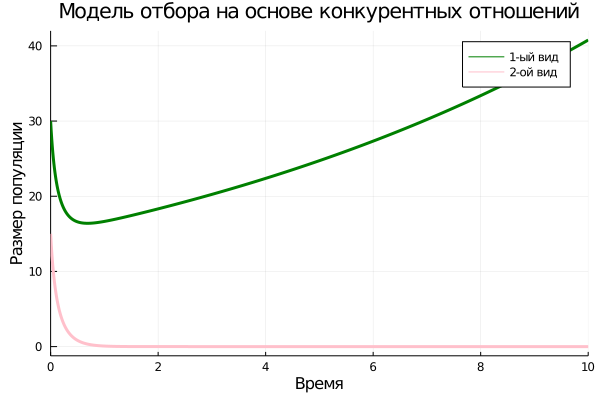

In [32]:
# строим график
plot(sol, linewidth=3, label = ["1-ый вид" "2-ой вид"], color=["green" "pink"], 
    title="Модель отбора на основе конкурентных отношений", xaxis="Время",yaxis="Размер популяции")

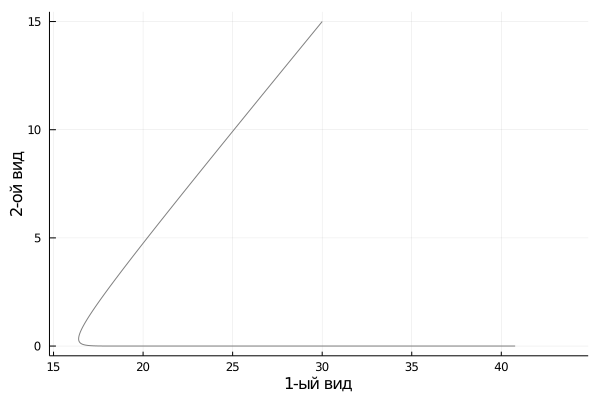

In [33]:
# фазовый портрет:
plot(sol, vars=(1,2), color="gray", xaxis="1-ый вид", yaxis="2-ой вид", legend=false)

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\6.otborKonkOtnoshenii.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\5ItHH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Admin\\6.otborKonkOtnoshenii.gif")
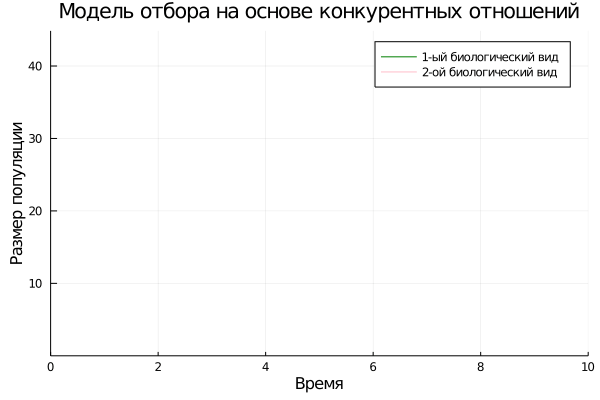

In [34]:
animate(sol, fps=7,linewidth=3, "6.otborKonkOtnoshenii.gif", label = ["1-ый биологический вид" "2-ой биологический вид"], color=[:green :pink],
    title="Модель отбора на основе конкурентных отношений", xaxis="Время",yaxis="Размер популяции")

Задание 7

In [35]:
# задаём описание модели:
lv! = @ode_def Oscillator begin
dx = y
dy = -(w0^2)*x
end w0
# задаём начальное условие:
u0 = [1.0, 3.0]
# задаём значения параметров:
p = (3.1)
# задаём интервал времени:
tspan = (0.0, 10.0)
# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 43-element Array{Float64,1}:
  0.0
  0.06360821298615765
  0.16088581827314855
  0.26988253193930023
  0.39135260806537686
  0.5394008803306547
  0.712376246058562
  0.8984394445965864
  1.0867554443482423
  1.3088786271222241
  1.5230676891712787
  1.7582107111566605
  2.0007197236844996
  ⋮
  7.087318549724779
  7.353058367556641
  7.636873559215488
  7.908210420520928
  8.185459389920716
  8.462918820264116
  8.72982994792044
  9.01355130991769
  9.271549407151616
  9.55988890880486
  9.819574366427023
 10.0
u: 43-element Array{Array{Float64,1},1}:
 [1.0, 3.0]
 [1.1702122877933732, 2.334544214217117]
 [1.3410779221430174, 1.1517423171782022]
 [1.3884093342720532, -0.2915280600402884]
 [1.2565508112492474, -1.8538003318745178]
 [0.8616016813152771, -3.387615680358242]
 [0.18237342869968778, -4.276724851741273]
 [-0.5994844268756924, -3.8931187589810388]
 [-1.1924039474906776, -2.224028215251119]
 [-1.376600387

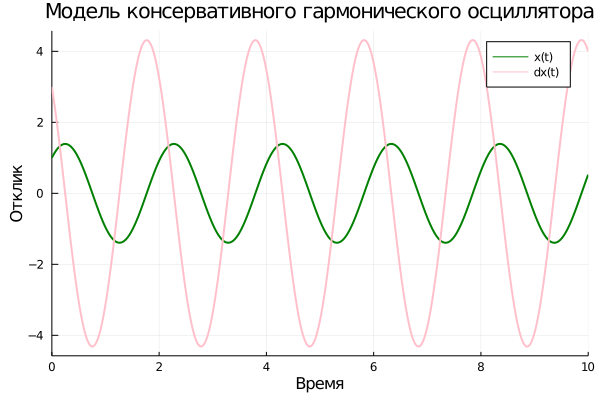

In [36]:
# строим график
plot(sol, linewidth=2, label = ["x(t)" "dx(t)"], color=["green" "pink"], 
    title="Модель консервативного гармонического осциллятора", xaxis="Время",yaxis="Отклик")

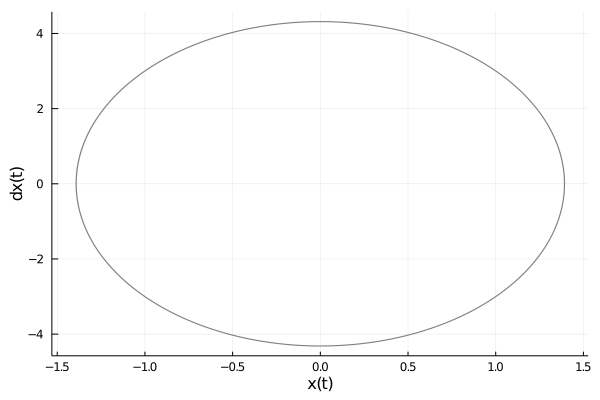

In [37]:
# фазовый портрет:
plot(sol, vars=(1,2), color="gray", xaxis="x(t)", yaxis="dx(t)", legend=false)

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\7.garmonOscil.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\5ItHH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Admin\\7.garmonOscil.gif")
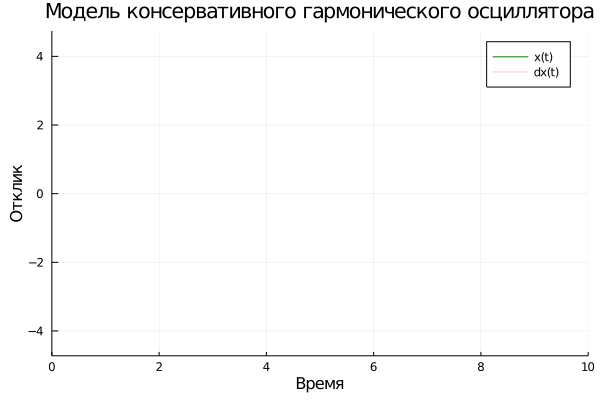

In [38]:
animate(sol, fps=7,linewidth=2, "7.garmonOscil.gif", label = ["x(t)" "dx(t)"], color=[:green :pink],
    title="Модель консервативного гармонического осциллятора", xaxis="Время",yaxis="Отклик")

Задание 8

In [39]:
# задаём описание модели:
lv! = @ode_def Oscillator2 begin
dx = y
dy = -2*v*y - (w0^2)*x
end v w0
# задаём начальное условие:
u0 = [0.3, 2.0]
# задаём знанчения параметров:
p = (0.7, 3.0)
# задаём интервал времени:
tspan = (0.0, 10.0)
# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 42-element Array{Float64,1}:
  0.0
  0.05948770714858458
  0.15779264119134842
  0.27017595788354126
  0.4045072775413231
  0.545131971590469
  0.7341354441308688
  0.9246935238717611
  1.1265150011938885
  1.3405858737189154
  1.57033033798381
  1.7951345333736388
  2.0554230389565746
  ⋮
  6.906551987749991
  7.1695165072580025
  7.470978089370668
  7.740927772430552
  8.0317014245028
  8.292689969698868
  8.603467318337042
  8.876261778121405
  9.172002456058344
  9.452603660617767
  9.769361021047924
 10.0
u: 42-element Array{Array{Float64,1},1}:
 [0.3, 2.0]
 [0.4089157023687488, 1.6568336619417476]
 [0.5420115746245624, 1.0453969337598665]
 [0.6196954086185085, 0.3424648698585409]
 [0.6138264392441349, -0.40511020483952714]
 [0.5131704206446253, -0.9859970213398712]
 [0.2843497065904478, -1.353797449750612]
 [0.0285695411730646, -1.2614517335376605]
 [-0.18455990735376337, -0.8073972160159423]
 [-0.29048079

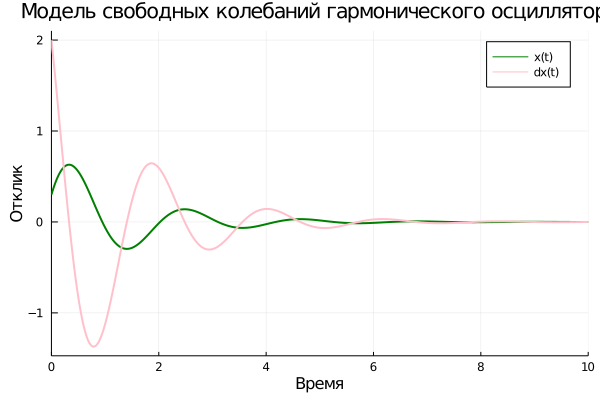

In [40]:
# строим график
plot(sol, linewidth=2, label = ["x(t)" "dx(t)"], color=["green" "pink"], 
    title="Модель свободных колебаний гармонического осциллятора", xaxis="Время",yaxis="Отклик")

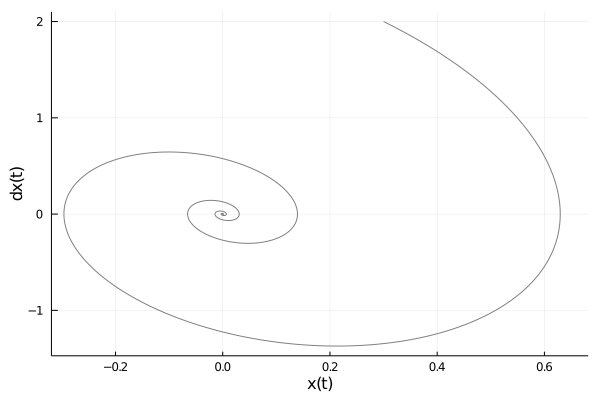

In [41]:
# фазовый портрет:
plot(sol, vars=(1,2), color="gray", xaxis="x(t)", yaxis="dx(t)", legend=false)

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\8.kolebOscil.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\5ItHH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Admin\\8.kolebOscil.gif")
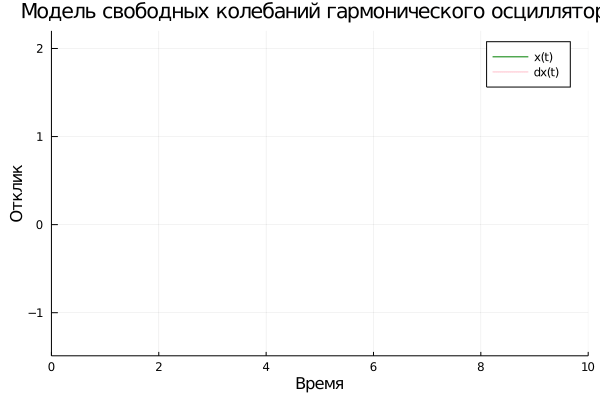

In [42]:
animate(sol, fps=7,linewidth=2, "8.kolebOscil.gif", label = ["x(t)" "dx(t)"], color=[:green :pink],
    title="Модель свободных колебаний гармонического осциллятора", xaxis="Время",yaxis="Отклик")